In [102]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_Noise_67.csv")

test_data = pd.read_csv("../ValidationData/neodata/fault_all_Noise_67.csv")

#train_data.head()
print(train_data)

           Pdis        T0         Tc       Tdis       Tret       Tsuc  \
0      9.918772  2.363044  39.085048  56.986032  25.332905  16.148663   
1      8.278406  8.364561  32.534204  38.935680  19.350853  14.811198   
2      9.483299 -1.866535  37.430519  59.473131  19.309728  11.578429   
3      7.999568  4.215552  31.327087  38.420261  10.780644   8.645915   
4      8.152837 -3.247549  31.993811  51.672939   6.178113   4.107977   
...         ...       ...        ...        ...        ...        ...   
1402  12.181156  2.878047  46.897957  69.069759  23.295755  15.160473   
1403   8.849582 -2.599989  34.917738  50.633035   5.893316   2.056989   
1404   9.747471  3.210785  38.440867  51.547386  14.137539   7.938497   
1405  13.475022 -1.903420  50.886056  77.224045  16.859170  12.382370   
1406  12.563993  2.132465  48.109814  70.842386  24.829140  17.161203   

            Tsh       Tsup     CondFan       Tamb  Tset  target  
0     13.706953  12.826511  100.000000   9.331227    12  

In [114]:
#standardization
import standardization as sd
from sklearn.preprocessing import StandardScaler


#Normalization / conditioning
standardizer = sd.standardization(train_data,'target')


trn = standardizer.transform(train_data)
tst = standardizer.transform(test_data)

#trn = train_data
#tst = test_data

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

# Fittig the training data first

In [115]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(trn.drop('target',axis=1), labels_trn)



SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [106]:
#predicting
numbers = targets

sample = trn
truth = sample['target'].to_numpy()


predict = clf.predict(sample.drop('target',axis=1))


print(truth)
print(predict)


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1


[ 0  0  0 ... 20 20 20]
[ 4 14  8 ... 20 20 20]


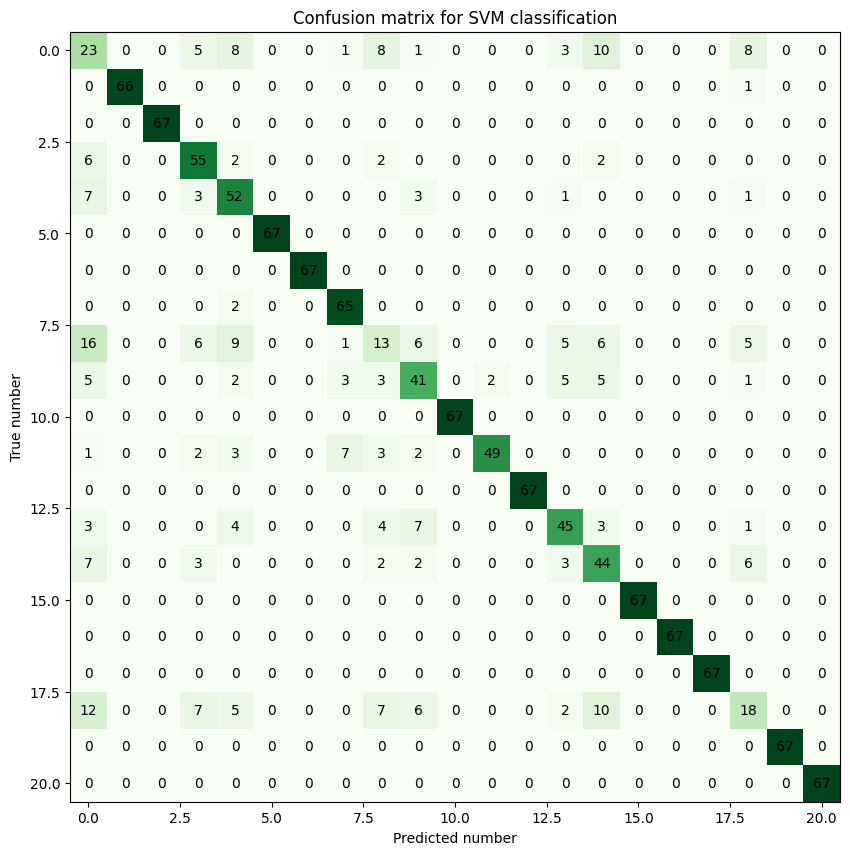

In [107]:
#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix for SVM classification")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

In [108]:
print(f"Accuracy: {clf.score(trn.drop('target',axis=1),trn['target'])*100}%")

Accuracy: 81.09452736318407%


# Testing on validation data

In [109]:
numbers = targets
truth = tst['target']

predict = clf.predict(tst.drop('target',axis=1))

print(truth.to_numpy())
print(predict)


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1


[ 0  0  0 ... 20 20 20]
[ 9 18  9 ... 20 20 20]


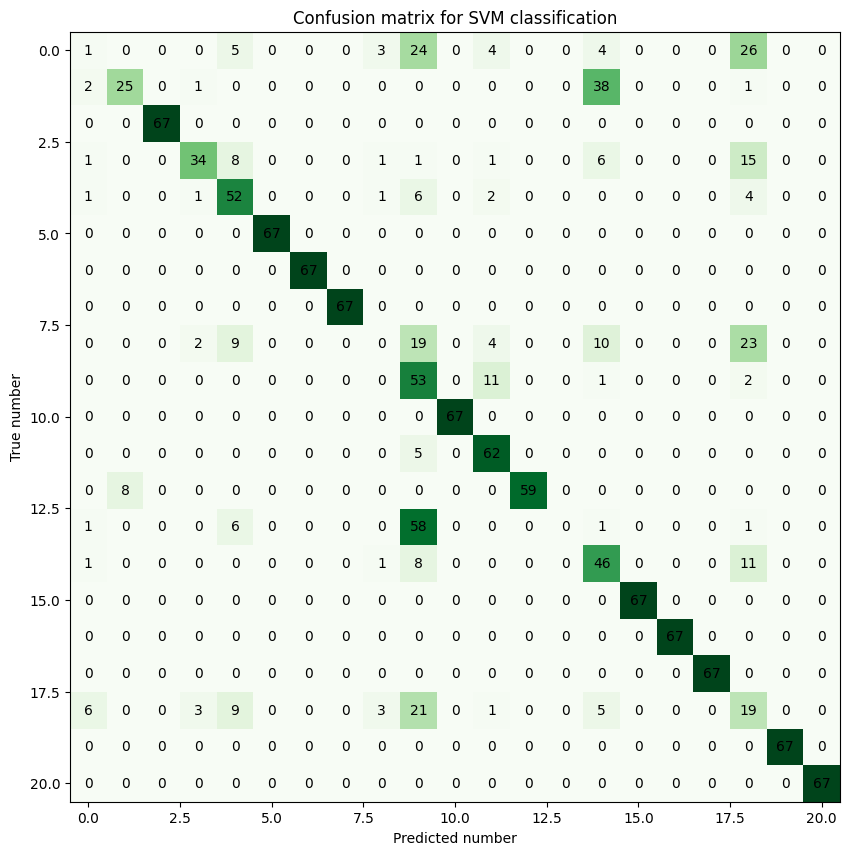

In [110]:
#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix for SVM classification")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

In [111]:
print(f"Accuracy: {clf.score(tst.drop('target',axis=1),tst['target'])*100}%")

Accuracy: 72.56574271499645%


Test preformed by LL at 02/11
With Noise 
without standardlization: Training = 90.90 %, Validation = 41.22 %
With standardlization: Training = 77.169 %, Validation 51.56 %

Without Noise
without standardlization: Training = 95.32  %, Validation = 33.33 %
With standardlization: Training = 90.57 %, Validation 80.95 %